In [75]:
# Thia model integrates an Bayes theorem derived odds ratio along with historic round 1 and 2 seed match up 
# with the rest of the games haves bayes derived odds only.
# under this model, a 16 seed team has a 0% chance of winning

In [76]:
import numpy as np
import timeit
from collections import Counter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
# Tuple Array of South, West, East and Midwest Regionals respectively, listed in the following seed ranking order (to match round 1 game matchup order) #1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15
R1teams = (("Kansas", "Austin Peay", "Colorado", "Connecticut", "Maryland", "South Dakota State", "California", "Hawaii", "Arizona", "Wichita State", "Miami", "Buffalo", "Iowa", "Temple", "Villanova", "UNC Asheville"),
            ("Oregon", "Holy Cross", "Saint Joseph's", "Cincinnatti", "Baylor", "Yale", "Duke", "UNC Wilmington", "Texas", "Northern Iowa", "Texas A&M", "Green Bay", "Oregon State", "VCU", "Oklahoma", "Cal State Bakersfield"),
            ("North Carolina", "Florida Gulf Coast", "USC", "Providence", "Indiana", "Chattanooga", "Kentucky", "Stony Brook", "Notre Dame", "Michigan", "West Virginia", "Stephen F Austin", "Wisconsin", "Pittsburgh", "Xavier", "Weber State"), 
            ("Virginia", "Hampton", "Texas Tech", "Butler", "Purdue", "Arkansas-Little Rock", "Iowa State", "Iona", "Seton Hall", "Gonzaga", "Utah", "Fresno State", "Dayton", "Syracuse", "Michigan State", "Middle Tennessee"))

R1Seed = ((1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15),
         (1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15),
         (1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15),
         (1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15))

# Historical outcomes of seed matchups from NCAA March Madness tournaments from 1985-2015 (all tournaments since 64 teams started competing)
# Matrix setup as shown below with numbers in cells representing the outcome of vertical seed's chance of beating horizontal seed
# Cells with "na" values are seeds that have never faced each other in the history of the tournament (since 1985) 
# seed 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16
#   1
#   2
#   3
#   4
#   5
#   6
#   7
#   8
#   9
#  10
#  11
#  12
#  13
#  14
#  15
#  16

seedmatch = (((18/36, 33/59, 17/28, 39/56, 34/41, 8/12, 4/5, 52/65, 57/62, 4/4, 3/6, 19/19, 4/4, "na", "na", 124/124),
              (26/59, 3/6, 25/45, 3/8, 1/4, 23/29, 55/72, 3/8, 0/1, 26/45, 13/14, 1/1, "na", "na", 117/124, "na"),
              (11/28, 17/45, 1/2, 4/7, 2/3, 38/66, 7/12, 1/1, 1/1, 9/13, 26/39, "na", "na", 104/124, 1/1, "na"),
              (17/56, 5/8, 3/7, 1/2, 36/66, 2/4, 2/4, 3/8, 2/2, 2/2, "na", 21/33, 99/124, "na", "na", "na"),
              (7/41, 3/4, 1/3, 30/66, 1/2, 1/1, "na", 1/3, 1/2, 1/1, "na", 80/124, 11/14, "na", "na", "na"),
              (4/12, 6/29, 28/66, 2/4, 0/1, 0.5, 3/6, 0/1, "na", 4/6, 81/124, "na", "na", 12/14, "na", "na"),
              (1/5, 17/72, 5/12, 2/4, "na", 3/6, 0.5, 1/2, "na", 75/124, 0/3, "na", "na", 1/1, 2/3, "na"),
              (13/65, 5/8, 0/1, 5/8, 2/3, 1/1, 1/2, 0.5, 63/124, "na", 1/1, 0/1, 1/1, "na", "na", "na"),
              (5/62, 1/1, 0/1, 0/2, 1/2, "na", "na", 61/124, 0.5, "na", "na", "na", 1/1, "na", "na", "na"),
              (0/4, 19/45, 4/13, 0/2, 0/1, 2/6, 49/124, "na", "na", 0.5, 0/2, "na", "na", 1/1, 0/4, "na"),
              (3/6, 1/14, 13/39, "na", "na", 43/124, 3/3, 0/1, "na", 2/2, 0.5, "na", "na", 5/5, "na", "na"),
              (0/19, 0/1, "na", 12/33, 44/124, "na", "na", 1/1, "na", "na", "na", 0.5, 8/11, "na", "na", "na"),
              (0/4, "na", "na", 25/124, 3/14, "na", "na", 0/1, 0/1, "na", "na", 3/11, 0.5, "na", "na", "na"),
              ("na", "na", 20/124, "na", "na", 2/14, 0/1, "na", "na", 0/1, 0/5, "na", "na", 0.5, "na", "na"),
              ("na", 7/124, 0/1, "na", "na", "na", 1/3, "na", "na", 0/4, "na", "na", "na", "na", 0.5, "na"),
              (0/124, "na", "na", "na", "na", "na", "na", "na", "na", "na", "na", "na", "na", "na", "na", 0.5)))

# Tuple Array of percent of total regular season games won of above teams respectively (prior to start of tournament)
STotWin = ((30/34, 18/35, 22/33, 24/34, 25/33, 26/33, 23/33, 27/32, 25/33, 24/32, 25/32, 20/34, 21/31, 21/32, 29/34, 22/33),
            (28/34, 14/33, 27/34, 22/32, 22/33, 22/28, 23/33, 25/32, 20/32, 22/34, 26/34, 23/35, 19/31, 24/34, 25/32, 24/32),
            (28/34, 20/33, 21/33, 23/33, 25/32, 29/34, 26/34, 26/32, 21/32, 22/34, 26/34, 27/32, 20/32, 21/32, 27/32, 26/34), 
            (26/33, 21/31, 19/31, 21/31, 26/34, 29/33, 21/32, 22/32, 25/33, 26/33, 26/34, 25/34, 25/32, 19/32, 29/34, 24/33))

#1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15
# Tuple Array of percent of last 10 regular season games won of above teams respectively (prior to start of tournament) ie Recency Factor
SL10Win = ((10/10, 8/10, 5/10, 7/10, 5/10, 8/10, 8/10, 8/10, 7/10, 7/10, 7/10, 6/10, 4/10, 7/10, 8/10, 7/10),
            (8/10, 5/10, 7/10, 6/10, 5/10, 9/10, 6/10, 8/10, 5/10, 9/10, 8/10, 8/10, 6/10, 7/10, 6/10, 9/10),
            (8/10, 7/10, 3/10, 5/10, 7/10, 8/10, 8/10, 8/10, 6/10, 5/10, 7/10, 10/10, 7/10, 4/10, 7/10, 9/10), 
            (7/10, 8/10, 6/10, 7/10, 7/10, 8/10, 5/10, 9/10, 8/10, 8/10, 9/10, 9/10, 6/10, 5/10, 9/10, 7/10))

# Tuple Array of percent of total regular season away games won of above teams respectively (prior to start of tournament)
AwayWin = ((13/17, 11/21, 6/16, 10/17, 9/16, 13/20, 5/15, 10/12, 8/15, 10/17, 10/16, 10/19, 8/16, 10/18, 14/18, 11/19),
            (10/16, 6/19, 15/18, 8/15, 8/14, 10/16, 8/15, 13/18, 6/15, 11/20, 9/16, 12/21, 7/16, 9/17, 11/17, 10/17),
            (13/18, 4/13, 5/15, 10/16, 8/15, 16/20, 9/17, 11/16, 7/16, 9/17, 13/19, 13/18, 7/14, 6/13, 12/16, 18/20), 
            (11/18, 12/20, 5/14, 8/15, 9/16, 15/19, 7/17, 11/19, 12/17, 15/18, 10/17, 9/16, 11/15, 6/15, 15/18, 13/19))

# Tuple Array of percent of total regular season games won of above teams respectively when played against a top 25 team (prior to start of tournament)
Top25Win = ((11/14, 0/2, 1/6, 1/4, 2/7, 0, 3/6, 0/1, 3/6, 1/1, 5/8, 0/2, 5/9, 3/7, 3/7, 0),
            (5/5, 0/1, 1/2, 1/4, 5/14, 0/1, 3/7, 0, 6/13, 3/3, 4/6, 0, 1/5, 0/2, 8/13, 0),
            (5/8, 0/1, 2/6, 4/9, 4/6, 0/1, 3/4, 0/1, 4/9, 3/12, 6/12, 0/1, 5/10, 1/8, 6/7, 0), 
            (7/9, 0/1, 3/11, 2/8, 2/7, 0, 4/11, 0, 4/7, 1/4, 2/4, 0/2, 1/2, 4/9, 5/7, 0))

# Tuple Array of number of regular season games of above teams respectively played against a top 25 team (prior to start of tournament)
Top25Played = ((14, 2, 6, 4, 7, 0, 6, 1, 6, 1, 8, 2, 9, 7, 7, 0),
            (5, 1, 2, 4, 14, 1, 7, 0, 13, 3, 6, 0, 5, 2, 13, 0),
            (8, 1, 6, 9, 6, 1, 4, 1, 9, 12, 12, 1, 10, 8, 7, 0), 
            (9, 1, 11, 8, 7, 0, 11, 0, 7, 4, 4, 2, 2, 9, 7, 0))

WtFctrTotWin = 0.34

WtFctrRecency = 0.33

WtFctrAwayWin = 0.33

RawScore = np.zeros((4,16))

for i in range(16):
    for j in range(4):
         RawScore[j][i] = WtFctrTotWin*STotWin[j][i] + WtFctrRecency*SL10Win[j][i] + WtFctrAwayWin*AwayWin[j][i]
            
# WeightedScore

# Winning streaks

# Win pct vs top 25 teams

#RawScore

In [78]:
# Tuple Array of historic number of times out of 124 games (since 1985) that seed 1 has beaten seed 16, 8 beaten 9, 5 beaten 12, 4 beaten 13, 6 beaten 11, 3 beaten 14, 7 beaten 10, and 2 beaten 15, respectively
R1SeedHistoric = (124, 63, 80, 99, 81, 104, 75, 117)


In [79]:
Champions = []
Final2 = []
Final4 = []
Elite8 = []
Sweet16 = []
Round2 = []
nChampOdds = []
nF2Odds = []
nF4Odds = []
nE8Odds = []
nS16Odds = []
nR2Odds = []
nRounds = [] # Placeholder as a number of rounds axis to plot with
cc = 0
n = 0
m = 1

In [80]:
# for i in range(8):
#    for j in range(4):
#        print(WeightedScore[j][2*i]*(R1SeedHistoric[i]/124))

In [81]:
# Probability calculation for round 1 for each game. Since the tournament always starts with the same teams facing each other, 
# the probability odds are fixed and thus placed out of the monte carlo loop

R1Prob = np.zeros((4,8))

for i in range(8):
    for j in range(4):
        R1Prob[j][i] = (RawScore[j][2*i]*(R1SeedHistoric[i]/124))/((RawScore[j][2*i]*(R1SeedHistoric[i]/124))+((RawScore[j][2*i+1])*(1-(R1SeedHistoric[i]/124))))




In [114]:
start = timeit.default_timer() # starts calculation time stopwatch


for i in range(10000):

    RawScore2 = np.zeros((4,8))
    RawScore3 = np.zeros((4,4))
    RawScore4 = np.zeros((4,2))
    RawScore5 = np.zeros((4,1))
    RawScore6 = np.zeros((2,1))
    
    R2Prob = np.zeros((4,4))
    R3Prob = np.zeros((4,2))
    R4Prob = np.zeros((4,1))
    R5Prob = np.zeros((2,1))
    R6Prob = np.zeros((1,1))
       
    R1Winners=[["", "", "", "", "", "", "", ""],
              ["", "", "", "", "", "", "", ""],
              ["", "", "", "", "", "", "", ""],
              ["", "", "", "", "", "", "", ""]]
    
    R2Seed = np.zeros((4,8), dtype = int)
    R3Seed = np.zeros((4,4), dtype = int)
    R4Seed = np.zeros((4,2), dtype = int)
    R5Seed = np.zeros((4,1), dtype = int)
    R6Seed = np.zeros((2,1), dtype = int)
    
    R2SeedHistoric = np.zeros((4,4))

    R2Winners=[["", "", "", ""],
              ["", "", "", ""],
              ["", "", "", ""],
              ["", "", "", ""]]

    R3Winners=[["", ""],
              ["", ""],
              ["", ""],
              ["", ""]]

    R4Winners=[[""],
              [""],
              [""],
              [""]]

    R5Winners=["", ""]

    Champion=[""]

#--------------------------------------------------------------------------------------------------------------------------------------
    #Random number generator for first round of games (8 games x 4 conferences) set up to randomize out of 124 (to match R1SeedHistoric)
    Rand1 = np.random.randint(100, size=(4, 8))

    # Round 1 simulation
    for i in range(8):
        for j in range(4):
            if Rand1[j][i]+1 < (R1Prob[j][i]*100):
                R1Winners[j][i] = R1teams[j][2*i]
                R2Seed[j][i] = R1Seed[j][2*i]
                RawScore2[j][i] = RawScore[j][2*i]
            else:
                R1Winners[j][i] = R1teams[j][2*i+1]
                R2Seed[j][i] = R1Seed[j][2*i+1]
                RawScore2[j][i] = RawScore[j][2*i+1]
                
    # Make seed matchup matrix for R1 winners            
    for i in range(4):
        for j in range(4):
            if seedmatch[(R2Seed[j][2*i])-1][(R2Seed[j][2*i+1])-1] == "na":
                R2SeedHistoric[j][i] = 0.5
            else:
                R2SeedHistoric[j][i] = seedmatch[(R2Seed[j][2*i])-1][(R2Seed[j][2*i+1])-1]

    Round2.append(R1Winners)
                
# --------------------------------------------------------------------------------------------------------------------------------------             
            
    for i in range(4):
        for j in range(4):
            R2Prob[j][i] = (RawScore2[j][2*i]*(R2SeedHistoric[j][i]))/((RawScore2[j][2*i]*(R2SeedHistoric[j][i]))+((RawScore2[j][2*i+1])*(1-(R2SeedHistoric[j][i]))))

    Rand2 = np.random.randint(100, size=(4, 4))  #Random generator for second round (4 games x 4 conferences)

    # Round 2 simulation
    for i in range(4):
        for j in range(4):
            if Rand2[j][i] < (R2Prob[j][i]*100):
                R2Winners[j][i] = R1Winners[j][2*i]
                R3Seed[j][i] = R2Seed[j][2*i]
                RawScore3[j][i] = RawScore2[j][2*i]
            else:
                R2Winners[j][i] = R1Winners[j][2*i+1]
                R3Seed[j][i] = R1Seed[j][2*i+1]
                RawScore3[j][i] = RawScore[j][2*i+1]
                
    Sweet16.append(R2Winners)
                
#--------------------------------------------------------------------------------------------------------------------------------------
    for i in range(2):
        for j in range(4):
            R3Prob[j][i] = (RawScore3[j][2*i]/(RawScore3[j][2*i]+(RawScore3[j][2*i+1])))

    Rand3 = np.random.randint(100, size=(4, 2))

    # Round 3 (Sweet 16) simulation 
    for i in range(2):
        for j in range(4):
            if Rand3[j][i] < (R3Prob[j][i]*100):
                R3Winners[j][i] = R2Winners[j][2*i]
                R4Seed[j][i] = R3Seed[j][2*i]
                RawScore4[j][i] = RawScore3[j][2*i]
            else:
                R3Winners[j][i] = R2Winners[j][2*i+1]
                R4Seed[j][i] = R3Seed[j][2*i+1]
                RawScore4[j][i] = RawScore3[j][2*i+1]
                
    Elite8.append(R3Winners) 
                
#--------------------------------------------------------------------------------------------------------------------------------------
    for i in range(1):
        for j in range(4):
            R4Prob[j][i] = (RawScore4[j][2*i]/(RawScore4[j][2*i]+(RawScore4[j][2*i+1])))
            
    Rand4 = np.random.randint(100, size=(4, 1))

    # Round 4 (Elite 8) simulation 
    for i in range(1):
        for j in range(4):
            if Rand4[j][i] < (R4Prob[j][i]*100):
                R4Winners[j][i] = R3Winners[j][2*i]
                R5Seed[j][i] = R4Seed[j][2*i]
                RawScore5[j][i] = RawScore4[j][2*i]
            else:
                R4Winners[j][i] = R3Winners[j][2*i+1]
                R5Seed[j][i] = R4Seed[j][2*i+1]
                RawScore5[j][i] = RawScore4[j][2*i+1]
                
    Final4.append(R4Winners)             
                
#--------------------------------------------------------------------------------------------------------------------------------------

    for i in range(2):
        R5Prob[i][0] = (RawScore5[2*i][0]/(RawScore5[2*i][0]+(RawScore5[2*i+1][0])))
            
    Rand5 = np.random.randint(100, size=(2, 1))

    # Round 5 (Final 4) simulation 
    for i in range(2):
        if Rand5[i][0] < (R5Prob[i][0]*100):
            R5Winners[i] = R4Winners[2*i][0]
            R6Seed[i][0] = R5Seed[2*i][0]
            RawScore6[i][0] = RawScore5[2*i][0]
        else:
            R5Winners[i] = R4Winners[2*i+1][0]
            R6Seed[i][0] = R5Seed[2*i+1][0]
            RawScore6[i][0] = RawScore5[2*i+1][0]      
            
    Final2.append(R5Winners)            
    
#--------------------------------------------------------------------------------------------------------------------------------------

    for i in range(1):
        R6Prob[i][0] = (RawScore6[2*i][0]/(RawScore6[2*i][0]+(RawScore6[2*i+1][0])))  

    Rand6 = np.random.randint(100, size=(1, 1))

    # Round 6 (Championship) simulation 

    if Rand6[0][0] < (R5Prob[i][0]*100):
        Champion = R5Winners[0]
    else:
        Champion = R5Winners[1]
    
    Champions.append(Champion)
    
#--------------------------------------------------------------------------------------------------------------------------------------

# Loop to track Villanova Champion odds every 100 tournaments
    if n == (m * 100):
        nChampOdds.append(Champions.count("Villanova") / len(Champions) * 100)
        nF2Odds.append(Final2.count(["Villanova", "North Carolina"]) / len(Final2) * 100)
        nF4Odds.append(Final4.count([["Villanova"], ["Oklahoma"], ["North Carolina"], ["Syracuse"]]) / len(Final4) * 100)
        nE8Odds.append(Elite8.count([["Kansas", "Villanova"], ["Oregon", "Oklahoma"], ["North Carolina", "Notre Dame"], ["Virginia","Syracuse"]]) / len(Elite8) * 100)
        nRounds.append(cc)
        cc = cc + 1
        m = m + 1
    n = n + 1
#--------------------------------------------------------------------------------------------------------------------------------------


stop = timeit.default_timer() # stops calculation time stopwatch

print("Calculation time:", stop - start, "seconds") # show total calculation time 


Calculation time: 41.92943023415137 seconds


In [103]:
print("Percentage of cases Villanova is champion:", Champions.count("Villanova") / len(Champions)   * 100, "%")
print("Odds Villanova wins championship:", len(Champions) / Champions.count("Villanova"), "to 1")

print(" ")
print("Percentage of cases Villanova and North Carolina match up in championship:", Final2.count(["Villanova", "North Carolina"]) / len(Final2)   * 100, "%")
print("Odds Villanova and North Carolina make championship:", len(Final2) / Final2.count(["Villanova", "North Carolina"]), "to 1")

print(" ")
F4P =  Final4.count([["Villanova"], ["Oklahoma"], ["North Carolina"], ["Syracuse"]]) / len(Final4)
print("Percentage of cases Villanova, Oklahoma, North Carolina and Syracuse make Final 4:", F4P, "%")
if F4P == 0:
    print("Odds Villanova, Oklahoma, North Carolina and Syracuse make Final 4: 0 to 1")
    print("Need to collect greater sample size for analysis.")
else:
    print("Odds Villanova, Oklahoma, North Carolina and Syracuse make Final 4:", 1 / F4P, "to 1")

print(" ")
E8P =  Elite8.count([["Kansas", "Villanova"], ["Oregon", "Oklahoma"], ["North Carolina", "Notre Dame"], ["Virginia","Syracuse"]]) / len(Elite8)
print("Percentage of cases Elite 8 correctly predicted:", E8P, "%")
if E8P == 0:
    print("Odds Elite 8 correctly predicted: 0 to 1")
    print("Need to collect greater sample size for analysis.")
else:
    print("Odds Elite 8 correctly predicted:", 1 / E8P, "to 1")

print(" ")
S16P = Sweet16.count([["Kansas", "Maryland", "Miami", "Villanova"], ["Oregon", "Duke", "Texas A&M", "Oklahoma"], ["North Carolina", "Indiana", "Notre Dame", "Wisconsin"], ["Virginia", "Iowa St", "Gonzaga", "Syracuse"]]) / len(Sweet16)
print("Percentage of cases Sweet 16 correctly predicted:", S16P, "%")
if S16P == 0:
    print("Odds Sweet 16 correctly predicted: 0 to 1")
    print("Need to collect greater sample size for analysis.")
else:
    print("Odds Sweet 16 correctly predicted:", 1 / S16P, "to 1")


print(" ")
R2P = Round2.count([["Kansas", "Connecticut", "Maryland", "Hawaii", "Wichita St", "Miami", "Iowa", "Villanova"], ["Oregon", "Saint Joseph's", "Yale", "Duke", "Northern Iowa", "Texas A&M", "VCU", "Oklahoma"], ["North Carolina", "Providence", "Indiana", "Kentucky", "Notre Dame", "Stephen F Austin", "Wisconsin", "Xavier"], ["Virginia", "Butler", "Arkansas-Little Rock", "Iowa St", "Gonzaga", "Utah", "Syracuse", "Middle Tennessee"]]) / len(Round2)
print("Percentage of cases 2nd Round correctly predicted:", R2P, "%")
if R2P == 0:
    print("Odds 2nd Round correctly predicted: 0 to 1")
    print("Need to collect greater sample size for analysis.")
else:
    print("Odds 2nd Round correctly predicted:", 1 / R2P, "to 1")
    
print(" ")    
print("------------------------------------------------------------------------------------------------------------------")
print(" ")
print("Number of times all 63 games correctly predicted:")

Percentage of cases Villanova is champion: 5.819354838709677 %
Odds Villanova wins championship: 17.184035476718403 to 1
 
Percentage of cases Villanova and North Carolina match up in championship: 1.4361290322580644 %
Odds Villanova and North Carolina make championship: 69.63162623539982 to 1
 
Percentage of cases Villanova, Oklahoma, North Carolina and Syracuse make Final 4: 0.0001225806451612903 %
Odds Villanova, Oklahoma, North Carolina and Syracuse make Final 4: 8157.894736842106 to 1
 
Percentage of cases Elite 8 correctly predicted: 1.6129032258064517e-05 %
Odds Elite 8 correctly predicted: 62000.0 to 1
 
Percentage of cases Sweet 16 correctly predicted: 0.0 %
Odds Sweet 16 correctly predicted: 0 to 1
Need to collect greater sample size for analysis.
 
Percentage of cases 2nd Round correctly predicted: 0.0 %
Odds 2nd Round correctly predicted: 0 to 1
Need to collect greater sample size for analysis.
 
------------------------------------------------------------------------------

In [116]:
print(len(nRounds), len(nChampOdds))

3399 3399


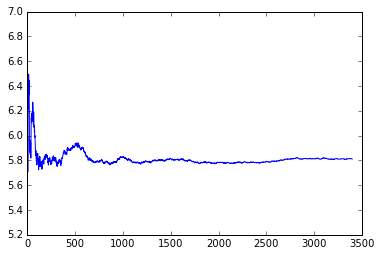

In [117]:
plot(nRounds, nChampOdds)

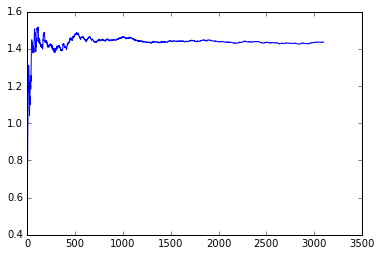

In [106]:
plot(nRounds, nF2Odds)

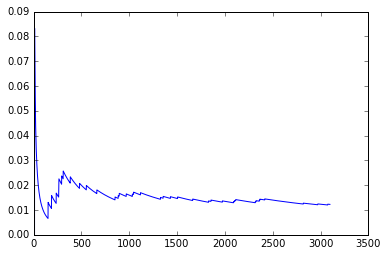

In [107]:
plot(nRounds, nF4Odds)

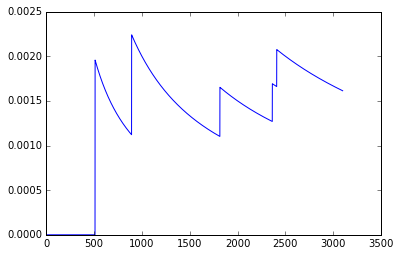

In [108]:
plot(nRounds, nE8Odds)

In [109]:
#plot(nRounds, nS16Odds)

In [110]:
#plot(nRounds, nR2Odds)

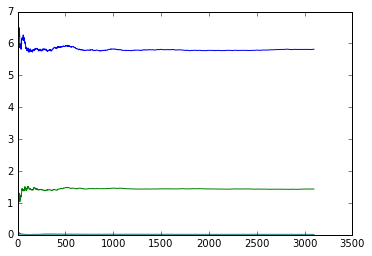

In [111]:
plot(nRounds, nChampOdds)
plot(nRounds, nF2Odds)
plot(nRounds, nF4Odds)
plot(nRounds, nE8Odds)
#plot(nRounds, nS16Odds)
#plot(nRounds, nR2Odds)

In [50]:
len(Champions)

908801

In [45]:
#List most recurring Champions in list

Counter(Champions).most_common(10)

[('Kansas', 2758),
 ('North Carolina', 2091),
 ('Oregon', 1539),
 ('Virginia', 1405),
 ('Seton Hall', 419),
 ('West Virginia', 353),
 ('Texan A&M', 326),
 ('Purdue', 313),
 ('Utah', 260),
 ('Indiana', 259)]

In [8]:
# Counts number of time the real world 2016 NCAA champion appears in our champions list

Champions.count("Villanova")

2860

In [35]:
Counter(Final2).most_common(5)

TypeError: unhashable type: 'list'